##Logistic Regression | Assignment 1

**Question 1:**  What is Logistic Regression, and how does it differ from Linear Regression?

**Answer**-
Logistic Regression is a supervised machine learning algorithm used primarily for classification problems, where the goal is to predict the probability of a categorical outcome. Unlike traditional regression, it uses a Sigmoid function to map any real-valued number into a range between 0 and 1, representing the likelihood of an event occurring (e.g., a "Yes/No" or "Pass/Fail" result)

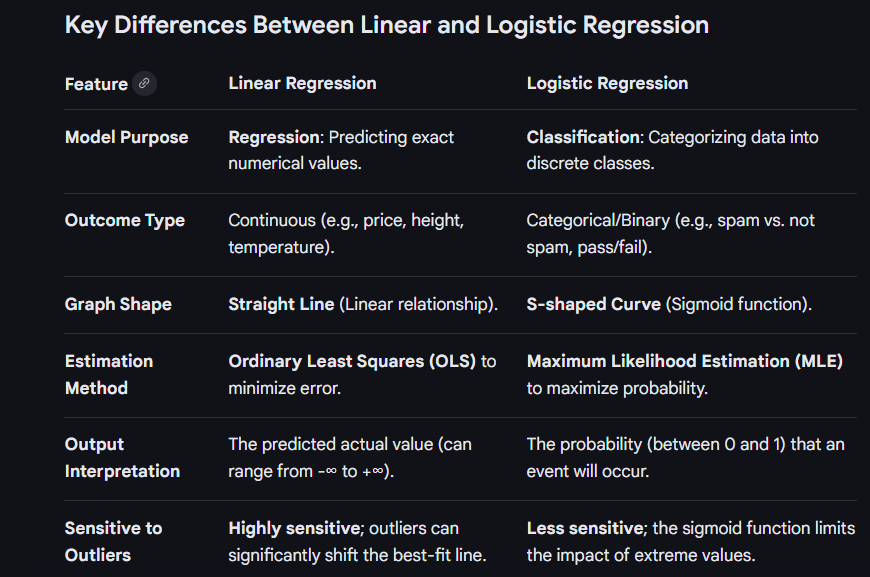

When to Use Each


Use Linear Regression when you need to forecast a quantity, such as predicting a car's fuel efficiency based on weight or estimating future sales volume.
Use Logistic Regression when you need to make binary decisions, such as determining if a customer will churn or if a medical treatment will be effective (Success/Failure)


**Question 2**: Explain the role of the Sigmoid function in Logistic Regression

**Answer**-

The Sigmoid function, also known as the logistic function, acts as the mathematical bridge that transforms a linear model's output into a usable classification probability.
Its key roles in Logistic Regression include:
Probability Mapping: The function "squashes" any real-valued number—ranging from negative infinity to positive infinity—into a strict range between 0 and 1. This allows the model's output to be interpreted directly as the probability of a specific class (e.g., a 0.85 result indicates an 85% likelihood).
Thresholding for Classification: By mapping values to this range, the Sigmoid function enables a decision boundary. Typically, a threshold of 0.5 is used:
If the Sigmoid output is
≥
0.5
≥
0
.
5
, the instance is predicted as Class 1.
If the output is
<
0.5
<
0
.
5
, it is predicted as Class 0.
Mathematical Smoothness: The function produces a smooth, "S-shaped" curve that is differentiable everywhere. This property is essential for optimization algorithms like Gradient Descent, as it allows the model to calculate gradients and update weights during training.
Non-linear Transformation: It introduces non-linearity into the model, allowing it to better fit datasets where a simple straight line cannot accurately separate the two binary classes.
The mathematical formula for the Sigmoid function is:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
where
𝑧
𝑧
 is the result of the linear equation (
𝑤
⋅
𝑥
+
𝑏
𝑤
⋅
𝑥
+
𝑏
)

**Question 3**: What is Regularization in Logistic Regression and why is it needed?

**Answer**-

Why Regularization is Needed


Prevents Overfitting: Regularization is critical when a model has too many features relative to the number of observations. Without it, the model may perfectly fit the training data (zero loss) but fail to generalize to new, unseen data.
Handles Multicollinearity: It stabilizes models when input variables are highly correlated, preventing small changes in data from causing massive shifts in the predicted coefficients.
Improves Generalization: By simplifying the model, regularization trades a small amount of training accuracy for a significant increase in the model's ability to make accurate predictions on real-world data.

Common Regularization Techniques


L1 Regularization (Lasso):

 Adds the absolute value of the coefficients as a penalty. It can shrink some coefficients exactly to zero, effectively performing feature selection by removing irrelevant predictors.

L2 Regularization (Ridge):

Adds the squared magnitude of the coefficients as a penalty. It shrinks coefficients toward zero but never makes them exactly zero, ensuring all features contribute while reducing their individual impact.

Elastic Net:

 A hybrid approach that combines both L1 and L2 penalties. It is particularly effective when dealing with datasets that have many correlated features.

**Question 4**: What are some common evaluation metrics for classification models, and why are they important?

**answer**-

Common Evaluation Metrics
Accuracy:
The percentage of total predictions that are correct (both positives and negatives). It is best suited for balanced datasets.

Precision:
 The ratio of true positives to all predicted positives. It answers: "Of all items predicted as positive, how many were actually correct?". High precision is vital when false positives are costly (e.g., marking a legitimate email as spam).

Recall (Sensitivity):
The ratio of true positives to all actual positive cases. It answers: "Of all actual positives, how many did the model find?". High recall is critical when false negatives are dangerous (e.g., missing a cancer diagnosis).

F1-Score: The harmonic mean of precision and recall, providing a single score that balances both. It is useful for imbalanced datasets where you want to minimize both false positives and false negatives.

ROC-AUC: Measures the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate across different thresholds. A higher AUC (closer to 1.0) indicates a better ability to distinguish between classes.

Confusion Matrix: A table summarizing the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). It serves as the foundation for calculating most other metrics.

Why These Metrics Matter
Risk Management:

Different fields prioritize different errors. In medical screening, high recall prevents missing illnesses, while in legal systems, high precision prevents wrongful convictions.
Handling Imbalance: Standard accuracy fails to detect performance on rare but critical classes (like fraud or rare diseases). Metrics like F1-score and AUC-ROC provide a more honest assessment.

Model Selection: Metrics help you compare models to choose the one that aligns with specific business goals (e.g., maximizing user experience by avoiding false alarms)

**Question 5**: Write a Python program that loads a CSV file into a Pandas DataFrame, splits into train/test sets, trains a Logistic Regression model, and prints its accuracy. (Use Dataset from sklearn package)

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- STEP 0: Prepare the dummy CSV file (Using sklearn dataset) ---
# We create a CSV file here so the 'read_csv' step below actually works.
data = load_breast_cancer()
df_original = pd.DataFrame(data.data, columns=data.feature_names)
df_original['target'] = data.target
df_original.to_csv('cancer_data.csv', index=False)
print("CSV file 'cancer_data.csv' created successfully.\n")


# --- MAIN PROGRAM STARTS HERE ---

# 1. Load a CSV file into a Pandas DataFrame
# [Reference: 1.1.1, 1.3.5]
df = pd.read_csv('cancer_data.csv')

# 2. Separate Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Split into train/test sets
# We use 20% of the data for testing and set a random_state for reproducibility.
# [Reference: 1.1.1, 1.3.3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Logistic Regression model
# Note: max_iter is increased to ensuring convergence for this specific dataset.
# [Reference: 1.3.2]
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# 5. Print the model's accuracy
# [Reference: 1.1.1, 1.3.5]
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


CSV file 'cancer_data.csv' created successfully.

Model Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 6**:  Write a Python program to train a Logistic Regression model using L2 regularization (Ridge) and print the model coefficients and accuracy.


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the dataset from sklearn
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression with L2 regularization (Ridge)
# 'penalty' defaults to 'l2'. 'C' is the inverse of regularization strength.
# We use 'liblinear' or 'lbfgs' solvers which support L2.
# [Reference: 1.2.6, 1.3.2]
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=3000)
model.fit(X_train, y_train)

# 4. Print the model coefficients
# .coef_ returns the weights assigned to each feature.
# [Reference: 1.1.4, 1.1.8]
print("Model Coefficients:")
coef_df = pd.DataFrame(model.coef_, columns=data.feature_names)
print(coef_df)

# 5. Predict and print accuracy
# [Reference: 1.1.11, 1.2.2]
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with L2 Regularization: {accuracy:.4f}")


Model Coefficients:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     2.132484      0.152772       -0.145091  -0.000829        -0.142636   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -0.415569        -0.65194            -0.344456      -0.207613   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0               -0.029774  ...       1.23215      -0.404581        -0.036209   

   worst area  worst smoothness  worst compactness  worst concavity  \
0   -0.027087         -0.262631          -1.208985        -1.617969   

   worst concave points  worst symmetry  worst fractal dimension  
0             -0.615251       -0.742764                 -0.11696  

[1 rows x 30 columns]

Model Accuracy with L2 Regularization: 0.9561


**Question 7**: Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr' and print the classification report.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Load the multiclass Iris dataset
# Contains 3 classes: setosa, versicolor, virginica
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression for multiclass classification
# We specify multi_class='ovr' to use the One-vs-Rest strategy
# Max_iter is increased to ensure model convergence
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# 4. Predict the labels for the test set
y_pred = model.predict(X_test)

# 5. Print the comprehensive classification report
# target_names provides the actual class labels for clarity
print("Classification Report (One-vs-Rest Strategy):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report (One-vs-Rest Strategy):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Question 8**: Write a Python program to apply GridSearchCV to tune C and penalty hyperparameters for Logistic Regression and print the best parameters and validation accuracy.

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Load and preprocess data
data = load_breast_cancer()
X, y = data.data, data.target

# Scaling is highly recommended for solvers like 'saga'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Define the model and hyperparameter grid
# We use the 'saga' solver because it supports both l1 and l2 penalties
model = LogisticRegression(solver='saga', max_iter=5000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']              # L1 (Lasso) and L2 (Ridge)
}

# 3. Apply GridSearchCV
# cv=5 performs 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Print results
# best_params_ and best_score_ store the optimal findings
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Validation Accuracy: {grid_search.best_score_:.4f}")

# Verify on the final test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Validation Accuracy: 0.9780
Test Set Accuracy: 0.9649


**Question 9**: Write a Python program to standardize the features before training Logistic Regression and compare the model's accuracy with and without scaling.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- APPROACH 1: Without Scaling ---
# Note: Unscaled data often requires more iterations to converge
model_unscaled = LogisticRegression(max_iter=5000)
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --- APPROACH 2: With Standardization ---
# Use StandardScaler to transform features to mean=0 and std_dev=1
# [Reference: 1.1.1, 1.1.6]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=5000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. Compare and print results
print(f"Accuracy WITHOUT Scaling: {acc_unscaled:.4f}")
print(f"Accuracy WITH Scaling:    {acc_scaled:.4f}")
print(f"Difference:               {acc_scaled - acc_unscaled:.4f}")


Accuracy WITHOUT Scaling: 0.9561
Accuracy WITH Scaling:    0.9737
Difference:               0.0175


**Question 10**: Imagine you are working at an e-commerce company that wants to predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.

**Answer**-

1. Data Handling & Feature Scaling
Data Cleaning: Handle missing values using median imputation (for numerical data) or mode (for categorical) to maintain data distribution.
Feature Scaling: Apply Standardization (mean=0, std dev=1) using StandardScaler. Logistic Regression relies on regularization (L1/L2) and gradient-based optimization, both of which are highly sensitive to unscaled features.
Encoding: Use One-Hot Encoding for categorical variables like "Last Product Category" or "Customer Location".
2. Balancing Classes
Since the data is highly imbalanced, a standard model will likely predict "No Response" for everyone to achieve 95% accuracy. Use these techniques:
Algorithm-Level (Cost-Sensitive Learning): Set class_weight='balanced' in the Logistic Regression model. This automatically assigns a higher penalty to misclassifying the minority class (the 5% who respond), forcing the model to learn their patterns more effectively.
Data-Level (Resampling): Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic responder profiles. Alternatively, use Random Under-sampling on the 95% non-responders if the dataset is extremely large.
3. Hyperparameter Tuning
Use GridSearchCV or RandomizedSearchCV to find the optimal configuration:
C (Inverse Regularization Strength): Tune across values (e.g., [0.01, 0.1, 1, 10]) to control model complexity and prevent overfitting to noise in the 5% responder group.
Penalty: Compare L1 (Lasso), which can perform feature selection by zeroing out irrelevant marketing metrics, and L2 (Ridge).
Optimization Metric: Instead of accuracy, optimize for F1-Score or ROC-AUC during the search.
4. Model Evaluation (The Business Context)
Standard accuracy is a "vanity metric" here. Instead, evaluate based on:
Recall: Crucial if you want to capture as many potential responders as possible. High recall ensures fewer "missed opportunities".
Precision: Crucial if marketing budget is tight. High precision ensures you aren't wasting money sending ads to people unlikely to respond.
F1-Score: The best overall balance for imbalanced marketing data.
Precision-Recall (PR) Curve: Often more informative than the ROC curve for 5% imbalanced data, as it focuses strictly on the performance of the minority class.
Confusion Matrix: Use this to visualize specifically where the model is failing (e.g., are we predicting too many false positives?).